In [42]:
import numpy as np
import random
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

class Rectangle:
    def __init__(self, x1, y1, length, width):
        # length is on x axis, width is on y axis
        self.x1 = x1
        self.y1 = y1
        self.length = length
        self.width = width
        self.visited = set([])
class recIteration:
    def __init__(self):
        self.visited = set([])
    def iterate(self, rec):
        # recursive call to iterate all subRectangles in this rectangle
        res = []
        tmp = Rectangle(rec.x1, rec.y1, rec.length, rec.width)
        res.append(tmp)
        if rec.length == 1 and rec.width == 1:
            return res
        else:
            if rec.length > 1:
                subTuple1 = (rec.x1, rec.y1, rec.length-1, rec.width)
                subTuple2 = (rec.x1+1, rec.y1, rec.length-1, rec.width)
                subRec1 = Rectangle(rec.x1, rec.y1, rec.length-1, rec.width)
                subRec2 = Rectangle(rec.x1+1, rec.y1, rec.length-1, rec.width)
                #res += subRec1.iterateRectangles()
                #res += subRec2.iterateRectangles()
                if not subTuple1 in self.visited:
                    self.visited.add(subTuple1)
                    res = res + self.iterate(subRec1)

                if not subTuple2 in self.visited:
                    self.visited.add(subTuple2)
                    res = res + self.iterate(subRec2)
            if rec.width > 1:
                subTuple3 = (rec.x1, rec.y1, rec.length, rec.width-1)
                subTuple4 = (rec.x1, rec.y1+1, rec.length, rec.width-1)
                subRec3 = Rectangle(rec.x1, rec.y1, rec.length, rec.width-1)
                subRec4 = Rectangle(rec.x1, rec.y1+1, rec.length, rec.width-1)
                #res += subRec3.iterateRectangles()
                #res += subRec4.iterateRectangles()
                if not subTuple3 in self.visited:
                    self.visited.add(subTuple3)
                    res = res + self.iterate(subRec3)
                if not subTuple4 in self.visited:
                    self.visited.add(subTuple4)
                    res = res + self.iterate(subRec4)
                    
        res.sort(key=lambda rec: rec.length*rec.width, reverse=True)
        return res
    def flush(self):
        self.visited = set([])
class RecVisual:
    # the overall expected rectangle is a rectangle of x_length * y_length
    def __init__(self, x_length, y_length):
        assert isinstance(x_length, int)
        assert isinstance(y_length, int)
        self.length = x_length
        self.width = y_length
        self.rectangles = []
        self.colorMap = list(mcolors.CSS4_COLORS)
        self.usedSquare = set([])

        self.minIndex = 0
        self.maxIndex = x_length*y_length-1

    def getUnitRectangles(self, rec):
        # return the index of (1x1) rectangles that are in this rectangle
        res = []
        leftBotX = rec.x1
        leftBotY = rec.y1
        length = rec.length
        width = rec.width
        for y in range(leftBotY, leftBotY+width):
            yIdx = y*self.length
            for x in range(leftBotX, leftBotX+length):
                res.append(x+yIdx)
        return res
    def getResultCoverage(self, n):
        # generate n random rectangles in this Rectangle's range
        # for each new rectangle, get the largest uncovered rectangle
        # return result coverage
        for i in range(n):
            rec = self.generateOneRec()
            self.dealRec(rec)
        print("Resulted coverage after n rectangles: " + str(len(self.usedSquare)))
        return len(self.usedSquare)

    def dealRec(self, rec):
        #subRecs = rec.iterateRectangles()
        iterator = recIteration()
        subRecs = iterator.iterate(rec)
        for rectangle in subRecs:
            unitRectangles = self.getUnitRectangles(rectangle)
            cover = False
            for idx in unitRectangles:
                if idx in self.usedSquare:
                    cover = True
                    break
            if not cover:
                self.rectangles.append(rectangle)
                # self.colorMap
                for idx in unitRectangles:
                    self.usedSquare.add(idx)
                break
            else:
                continue


    def generateOneRec(self):
        # randomly generate one sub rectangle in this rectangle
        recLength = random.randint(1, self.length)
        recWidth = random.randint(1, self.width)

        x1 = random.randint(0, self.length-recLength)
        y1 = random.randint(0, self.width-recWidth)
        rec = Rectangle(x1, y1, recLength, recWidth)
        return rec

    def coverFull(self, totalTimes):
        # try to cover the whole rectangle n times.
        # in each time, record the number of sub Rectangles to cover this rectangle
        # return total_number / totalTimes, as the average rectangles needed to cover the whole rectangle
        totalNum = 0
        for i in range(totalTimes):
            while len(self.usedSquare) != self.width*self.length:
                rec = self.generateOneRec()
                self.dealRec(rec)
                totalNum += 1
            self.visual()
            self.flush()
        print("average number of rectangles needed to fill the rectangle:" + str(totalNum*1.0/totalTimes))
        return totalNum*1.0/totalTimes

    def flush(self):
        # flush self rectangle
        self.rectangles = []
        self.usedSquare = set([])
    def visual(self):
        # visualize this rectangle
        v1, v2 = plt.subplots()
        for i in range(len(self.rectangles)):
            x1 = self.rectangles[i].x1
            y1 = self.rectangles[i].y1
            length = self.rectangles[i].length
            width = self.rectangles[i].width

            color = self.colorMap[i]
            x_left = x1
            x_right = x_left + length
            y_lower = y1
            y_upper = y1+width
            x_axis = np.arange(x_left, x_right+1, 1)
            plt.fill_between(x_axis, y_lower, y_upper, color=color, alpha='1')

        plt.axis([0, self.length, 0, self.width])
        plt.show()

In [43]:
#create a 20*10 desired coverage range
visualRec = RecVisual(20,10)

In [44]:
# let n = 10, aka, we have 10 communication towers (10 square footprints)
visualRec.flush()
coverage = visualRec.getResultCoverage(10)
ratio = (coverage*1.0/(20*10))
print ("coverage relative to the desired: " + str(ratio))
if ratio < 1:
    print ("there is a gap in coverage")
else:
    print ("there is no gap in coverage")

Resulted coverage after n rectangles: 172
coverage relative to the desired: 0.86
there is a gap in coverage


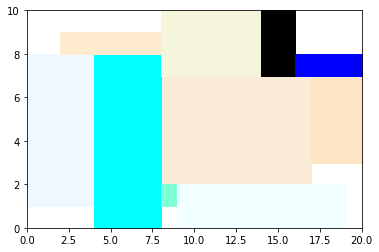

In [45]:
visualRec.visual()

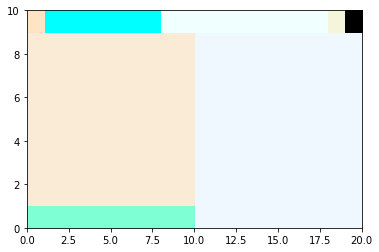

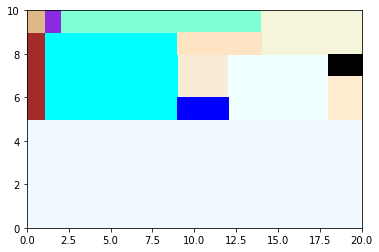

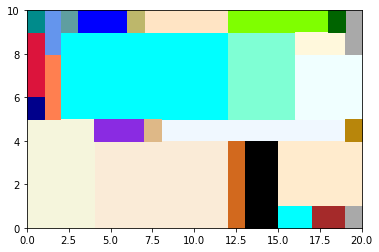

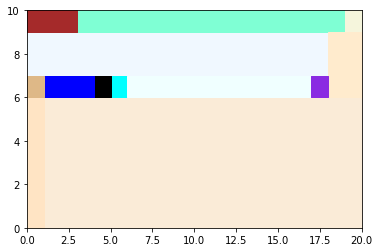

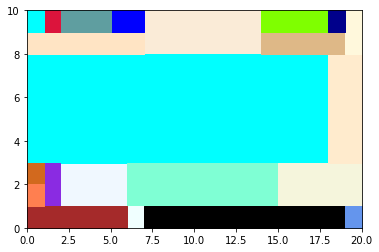

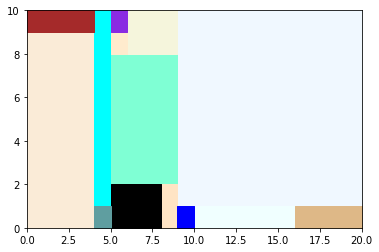

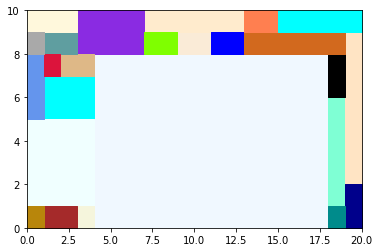

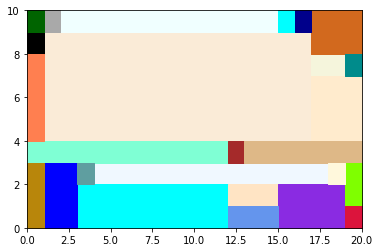

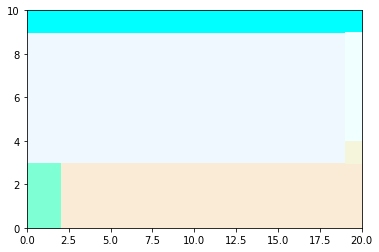

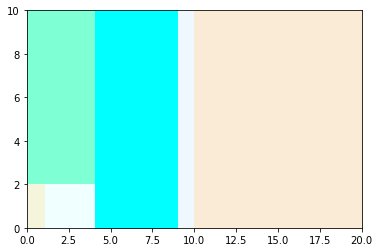

average number of rectangles needed to fill the rectangle:48.0


48.0

In [46]:
# run 10 times
visualRec.flush()
visualRec.coverFull(10)